In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
plt.style.use('paperPlot')

In [4]:
def bootstrapping_mean(sample, nsamples):
    n = len(sample)
    samples = []
    for i in range(nsamples):
        samples.append(np.random.choice(sample, n, replace=True))
    sampleMeans = np.mean(samples, axis=0)
    return np.std(sampleMeans)

In [5]:
minBathRad1 = 31.0175245
maxBathRad1 = 50.
minBathRad2 = 50.
maxBathRad2 = 75.
minBathRad3 = 75.
maxBathRad3 = 110.
minBathRad4 = 110.
maxBathRad4 = 158.266943
radii1 = np.linspace(minBathRad1, maxBathRad1, 5, endpoint=True)
radii2 = np.linspace(minBathRad2, maxBathRad2, 5, endpoint=True)
radii3 = np.linspace(minBathRad3, maxBathRad3, 5, endpoint=True)
radii4 = np.linspace(minBathRad4, maxBathRad4, 5, endpoint=True)

In [6]:
path = '/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/'
mfpts = []
fpts = []
radii = np.append(radii1, radii2[1:])
errs = []
for rad in radii:
    fpt = pickle.load(open(path+"fpts_on_parallel_200runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
for rad in radii3[1:]:
    fpt = pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed1.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed2.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
for rad in radii4[1:]:
    fpt = pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed1.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed2.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed3.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_25runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed4.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_25runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed5.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
radii = np.append(radii, radii3[1:])
radii = np.append(radii, radii4[1:])

In [7]:
print radii

[  31.0175245    35.76314337   40.50876225   45.25438113   50.           56.25
   62.5          68.75         75.           83.75         92.5         101.25
  110.          122.06673575  134.1334715   146.20020725  158.266943  ]


In [8]:
mfpts = np.array(mfpts)
errors =  np.array(errs)
kon = 1./mfpts
vols = np.pi*np.power(radii,3)*4./3.
Na = 6.022
c = 1./(Na*vols) * 1e10

In [9]:
print kon/c #approximately the rate

[  7.69958967e-11   6.49705843e-11   5.62563674e-11   5.75574094e-11
   5.60025516e-11   5.46583345e-11   5.18091983e-11   5.18792361e-11
   5.84744542e-11   4.76786485e-11   5.41545149e-11   5.51480393e-11
   5.20454033e-11   5.52317165e-11   5.47644190e-11   5.44842891e-11
   5.49638670e-11]


In [10]:
kon_err = errors/(mfpts*mfpts)

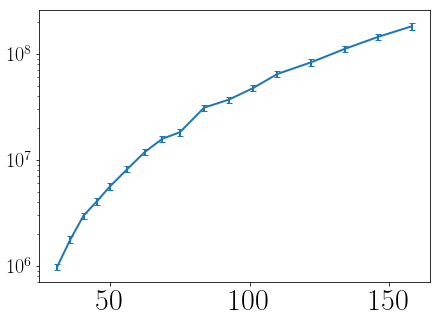

In [11]:
plt.errorbar(radii, mfpts, yerr=errors)
plt.yscale('log')

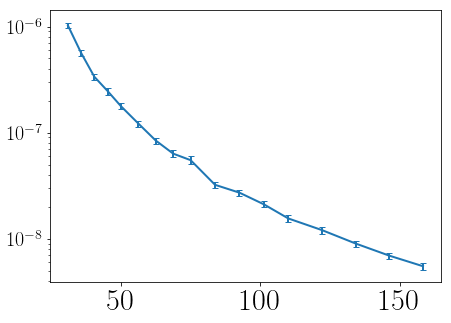

In [12]:
plt.errorbar(radii, kon, yerr=kon_err)
plt.yscale('log')

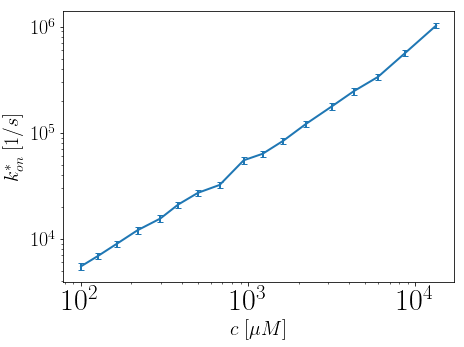

In [26]:
# convert from 1/ps to 1/s
plt.errorbar(c, kon*1e12, yerr=kon_err*1e12)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
#plt.savefig('../Paper/figs/myoglobin/onRateMyoglobin.pdf', bbox_inches='tight')

# Check rate from finite differences

In [16]:
rate = np.diff(kon)/np.diff(c)*1e12 #1/(mu M s)
rate_err = (kon_err[1:] + kon_err[:-1])/np.diff(c)*1e12

In [17]:
print rate_err, rate

[-21.66899885 -22.40511014 -24.4101177  -28.64859843 -21.55648536
 -21.82292807 -24.54720283 -32.62828442 -25.51273323 -23.69455472
 -27.92038534 -29.87045622 -25.11839975 -27.63451025 -29.08184464
 -33.52486257] [ 99.56590379  84.19672134  52.9561716   62.01591536  59.17416078
  62.322616    51.59760365  29.76781224  85.98520789  29.03340288
  50.96477066  66.13822128  43.35182752  56.66144803  55.71436994
  52.69885468]


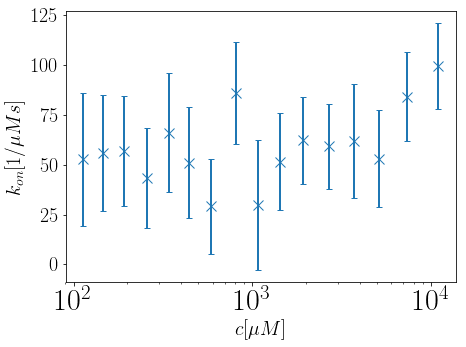

In [18]:
plt.errorbar((c[1:]+c[:-1])/2., rate, yerr=rate_err, fmt='x')
plt.xscale('log')
plt.xlabel('$c [\mu M]$')
plt.ylabel('$k_{on} [1/ \mu M s]$')
#plt.savefig('../Paper/figs/myoglobin/reactionRate.pdf', bbox_inches='tight')

In [19]:
print np.mean(rate), np.std(rate)
#This is also in correspondence to what we find using the linear fit method

58.8840629768 18.1810575695


# Use linear fit instead of finite differences (final version)

In [20]:
from scipy import optimize

In [21]:
fitfunc = lambda p, x: p[0] + p[1]*x
# Scale point with 1/err to obtain an error estimate
errfunc = lambda p, x, y, err: (y-fitfunc(p, x))/err
out = optimize.leastsq(errfunc, [-2000, 200], args=(c, kon*1e12, 2*kon_err*1e12), full_output=1)

In [22]:
covar = out[1]
params = out[0]
print out[0]
print covar

[-354.34702871   56.24332012]
[[  4.40779107e+05  -1.08350408e+03]
 [ -1.08350408e+03   6.16886537e+00]]


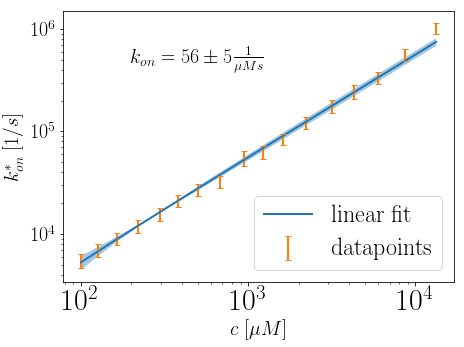

In [25]:
#plt.plot(c, (slope[0]*c+slope[1]), label='linear fit')
#plt.plot(c, (out[0][1]*c+out[0][0]), label='linear error fit')
plt.plot(c, params[1]*c + params[0], label='linear fit')
plt.fill_between(c, (params[1]+2*np.sqrt(covar[1][1]))*c + (params[0]-2*np.sqrt(covar[0][0])), (params[1]-2*np.sqrt(covar[1][1]))*c + (params[0]+2*np.sqrt(covar[0][0])), alpha=0.4)
plt.errorbar(c, kon*1e12, yerr=2*kon_err*1e12, label='datapoints', fmt='.', markersize=1)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.text(200, 4*1e5, '$k_{on} = %0.0f \pm %0.0f \\frac{1}{\mu M s}$'%(params[1], 2*np.sqrt(covar[1][1])), fontsize=20)
#plt.savefig('../Paper/figs/myoglobin/reactionRateFit_pbc.pdf', bbox_inches='tight')

# off rate

In [34]:
fpt_off = pickle.load(open("/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/fpts_off10000_runs_lag150_eps0.33_240partitions_lcs_rad25_fixed.p", 'r'))

In [39]:
print np.mean(fpt_off)
print 1/np.mean(fpt_off)*1e6

52707.82125
18.9725163417


In [50]:
# use std error as confidence estimate
# rounds up to 0.2
print np.std(fpt_off)/(100*np.mean(fpt_off)**2)*1e6

0.157883894952
